# **An Anaylsis of the New York City Housing Market**
#### By Jaden Leonard & Parhinder Singh
#### CMSC320 Final Project

---
# Introduction

We have decided to base our project around the New York Housing Market dataset from
Kaggle, see it [here](https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market)
We chose this dataset because we found its potential to be promising when it comes to
cleaning, processing, analyzing, and outputting useful information. Our team has a vision in
which we can utilize the different given datasets to generate useful predictions about the gritty
and unforgiving housing market within New York. These predictions will have massive upsides
at the cost of little to no time as we plan to use artificial intelligence in the end to acquire and
distribute the best information for a customer that is new to the city and is actively searching for
housing in a timely manner. Our team looks forward to how we can utilize this information for
the best

#### Questions & Hypothesis
*i. Does the type of property (e.g., co-op, condo, house) have a statistically significant effect on its price?*

HO: We believe that the type of property will **not** have an effect on its respective price, we believe this because we understand the NYC (New York City) housing market relies far more on its location rather than the type of space it is.

*ii. Does the city or region influence the distribution of property types?*

HO: We decided to believe the city or region **does** have an effect on the distribution of property types. We believe this to be likely as NYC is a very dense and concentrated city, apartments and condos take up less space, so they are more likely to stay together in the more dense areas, while the lesser dense areas will more likely contain houses.

*iii. How does the average price of a specific property type (e.g., condos) in New York compare to a hypothetical national average?*

HO: NYC is notorious for its cut-throat housing market, so we believe that the average price will be a **large over-estimate** when comparing it to the national average.



> ***What can we tell with our answers?***
>
> Understanding the effects of property type on price and location on property distribution provides essential insights for economic planning, investment decisions, and consumer choices in real estate. Additionally, comparing local property prices in New York City to the national average helps in assessing market dynamics and informing policy and urban development strategies.



---
# Part 1: Data Collection & Data Cleaning

This dataset is a collection of all different types of New York houses and their prices. It is a CSV files that contains many different features and information of the house that can be used to analyze price, size, and location as well

**Some of the key features:**
- Price of house
- Type of house
- Number of Beds
- Number of Bathrooms
- Property Square Footage

### First we import the csv file and neccessary libraries and display the table

In [1]:
# importing necessary libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv('NY-House-Dataset.csv')

# Display the first few rows of the DataFrame to verify the import
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


After taking a look at the data we can see that there are a few errors in the data that need to be cleaned and fixed

**Errors in the Data Include:**
1. Address Information Redundancy
2. Inconsistent State Representation
3. Potential Data Entry Errors in BATH Column
4. Possible Inconsistencies in Administrative Area Levels

**Thing we can fix:**
1. Address Simplification
2. State and City Information
3. Bathroom Count Normalization

### Here we are just using the taking the main features using them to clean up the data

In [3]:
# Preliminary cleaning
df_cleaned = df[['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE']].copy()
df_cleaned['BATH'] = df_cleaned['BATH'].apply(lambda x: round(x * 2) / 2)

We create a function called extract_location_info that takes in an address parameter. It splits it and takes only the necessary features of the address

In [4]:
# Extract City, State, and ZIP Code
def extract_location_info(address):
    parts = address.split(',')
    if len(parts) > 2:
        city = parts[-3].strip()
        state_zip = parts[-2].strip().split(' ')
        state = state_zip[0]
        zip_code = state_zip[1] if len(state_zip) > 1 else None
        return city, state, zip_code
    return None, None, None

We use the function to clean our address data and apply it to the data base. Then we convert our price property and property sqft to numeric values. The function drop_duplicates and dropna is also used to remove duplicate entries and check missing values and handles them

In [5]:
df_cleaned[['CITY', 'STATE', 'ZIP']] = df_cleaned.apply(lambda row: pd.Series(extract_location_info(row['FORMATTED_ADDRESS'])), axis=1)

# Ensure Data Type Consistency
df_cleaned['PRICE'] = pd.to_numeric(df_cleaned['PRICE'], errors='coerce')
df_cleaned['PROPERTYSQFT'] = pd.to_numeric(df_cleaned['PROPERTYSQFT'], errors='coerce')

# Check for and Remove Duplicate Entries
df_cleaned.drop_duplicates(subset=['FORMATTED_ADDRESS', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT'], inplace=True)

# Checking for missing values in key columns and handling them
df_cleaned.dropna(subset=['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT'], inplace=True)

# After cleaning
display(df_cleaned.head(100))

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,CITY,STATE,ZIP
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,New York,NY,10022
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.000000,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,New York,NY,10019
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,Staten Island,NY,10312
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,New York,NY,10022
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.5,14175.000000,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,New York,NY,10065
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Brokered by Douglas Elliman - 3544 Johnson Ave,Co-op for sale,1295000,4,2.0,1995.000000,"2501 Palisade Ave #2, Bronx, NY 10463, USA",40.880987,-73.922434,Bronx,NY,10463
97,Brokered by Sowae Corp,House for sale,245000,3,1.0,2184.207862,"2942 Lurting Ave, Bronx, NY 10469, USA",40.869011,-73.856444,Bronx,NY,10469
98,Brokered by Americas Real Estate Advisors,House for sale,400000,7,3.0,2385.000000,"340 E 234th St, Bronx, NY 10470, USA",40.896915,-73.865498,Bronx,NY,10470
99,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,55000000,8,8.0,12000.000000,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632,New York,NY,10023


---
# Part 2: Exploratory Data Analysis

Going forward, we have decided to set an alpha value = 0.05 for all tests to keep a standard.

## **Analyzing Question I**

**Null Hypothesis:** The ***type*** has an effect on the ***price***.

We decided to utilize an ANOVA test in order to find the statisitcal significance in the variance between the means of the prices of the different categories of housing.

In [6]:
# Filter the dataset to include only the main property types
main_property_types = ['Co-op for sale', 'House for sale', 'Condo for sale', 'Multi-family home for sale', 'Townhouse for sale']
df_filtered = df_cleaned[df_cleaned['TYPE'].isin(main_property_types)]

# Perform ANOVA to compare the prices across different property types
anova_result = stats.f_oneway(
    df_filtered[df_filtered['TYPE'] == 'Co-op for sale']['PRICE'],
    df_filtered[df_filtered['TYPE'] == 'House for sale']['PRICE'],
    df_filtered[df_filtered['TYPE'] == 'Condo for sale']['PRICE'],
    df_filtered[df_filtered['TYPE'] == 'Multi-family home for sale']['PRICE'],
    df_filtered[df_filtered['TYPE'] == 'Townhouse for sale']['PRICE']
)

print(f"ANOVA test statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

ANOVA test statistic: 2.0333571714924368
p-value: 0.08701901255279075


### Conclusion for Question I

We fail to reject this hypothesis because we can see that it is greater than our p value is greater than the alpha value.

### Visualizing our Conclusion

We decided to use a box & whiskers plot in order to better visualize the differences in the conclusions.


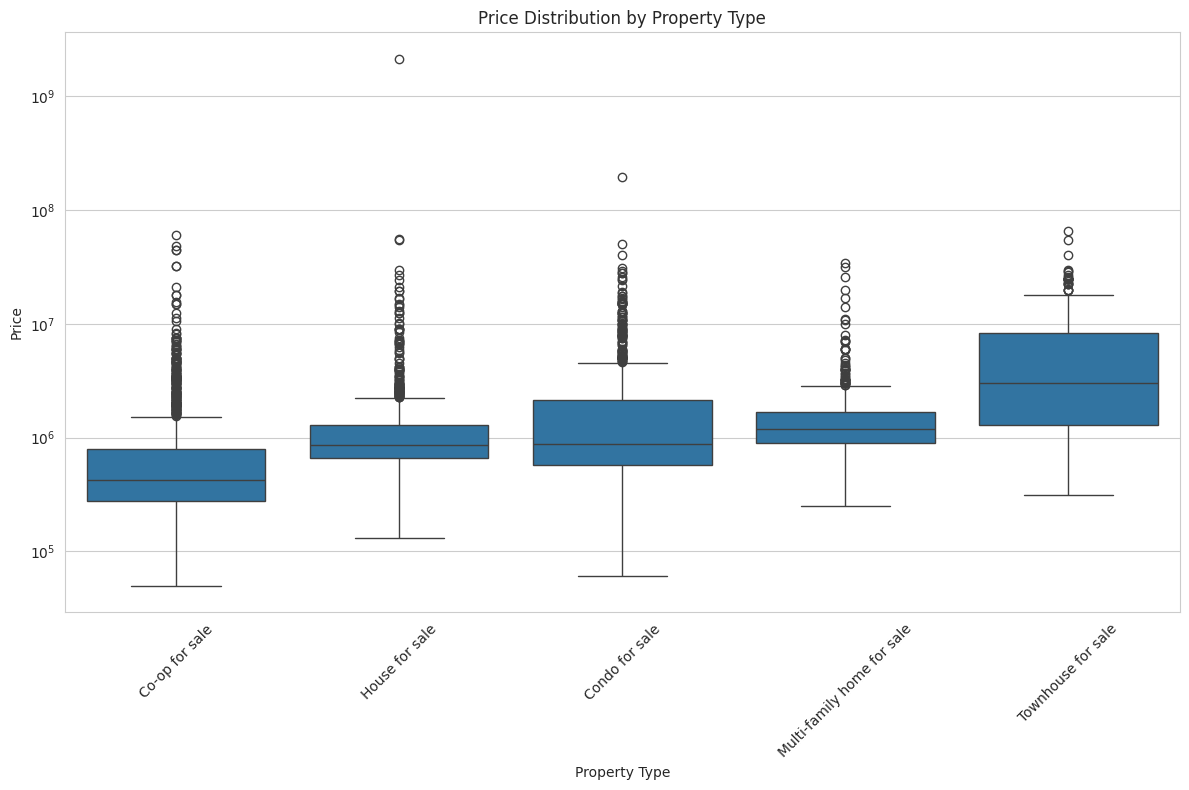

In [7]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a boxplot to visualize the distribution of prices for each property type
plt.figure(figsize=(12, 8))
sns.boxplot(x='TYPE', y='PRICE', data=df_filtered, order=main_property_types)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.yscale('log')  # Using a logarithmic scale for better visualization of wide price ranges
plt.tight_layout()

# Show the plot
plt.show()

### Understanding our Conclusion

In the plot we can see that there is a good bit of variability in the price distributions and the types as well too. We can make a few observations from the boxplot.

**Some key features**
- Price Variability - We can see that there is a good bit of range for the property types. This shows the diverse market conditions of the different properties
- Price Medians - The price medians from the different house categories varies significantly. This can indicate buyers looking for different properties can expect to pay more
- Outliers - These outliers present, especially in townhouses and condos, indicate the existence of luxurious properties that skew the average price
- Spread of the prices - The spread varies a lot across properties where wide ones suggest more varability in pricing and narrow boxes represnt more uniform pricing

**Real World Implicatations**
- Pricing Strategy - Using this visualization we can see the distrubition of prices for properties. This can help sellers list at competitive prices and help buyers see if it the price is reasonable
- Investment Decisions - Buyers can see which properties offer potential for the highest return and can invest



## **Analyzing Question II**

**Null Hypothesis:** The ***location*** has an effect on the ***type***

We can use a Chi-Square test to determine if a location in New York has an influence on the type of property that is available. This test will look at the different types of housing across various cities to see if distrubition is uniform or significantly different. We will use the city and type from the contingency.


In [8]:
from scipy.stats import chi2_contingency

# Creating a contingency table for "CITY" and "TYPE"
contingency_table = pd.crosstab(df_cleaned['CITY'], df_cleaned['TYPE'])

# Performing the Chi-square test of independence
_, p_value, _, _ = chi2_contingency(contingency_table)

print(p_value)

1.4430841991519135e-222


### Results

With the extremly low p-value that is far lesser than our chosen alpha value of 0.05, we choose to reject the null hypothesis that the CITY has an effect on the TYPE. This can suggest that the type of property is affected by the city or the region and we can see that the location does have a significant effect on the property type.

### Visualization
The best graph to use here is a bar graph that will best show the distirubtion of the house types across the type the top 10 cities. The visualization supports our test result because each city shows a unique profile in terms of property types.

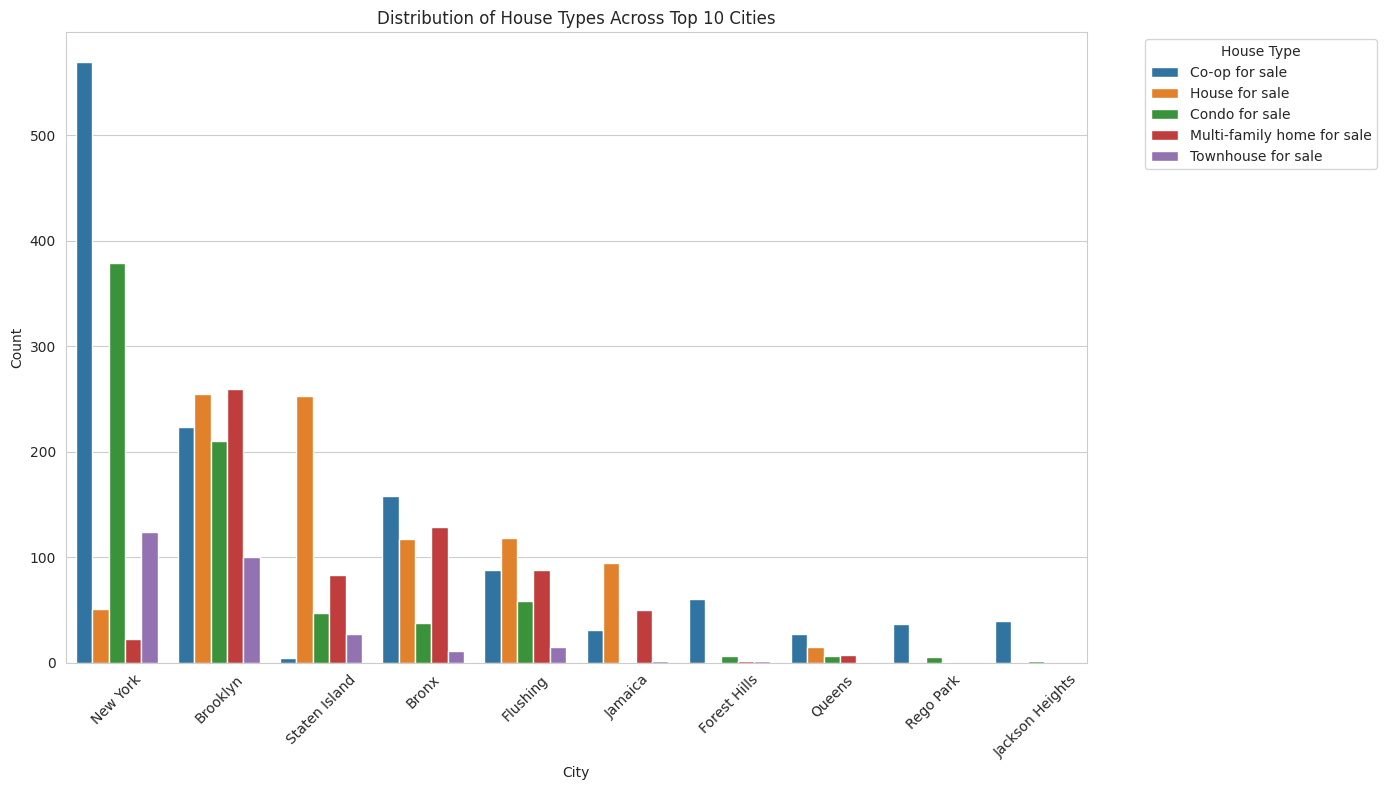

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limiting the data to the top 10 cities by frequency to keep the chart readable
top_cities = df_cleaned['CITY'].value_counts().head(10).index

# Further limiting the data to the top house types for visualization
top_types = df_cleaned['TYPE'].value_counts().head(5).index

# Filtering the DataFrame to include only rows that match the top cities and types
filtered_df = df_cleaned[df_cleaned['CITY'].isin(top_cities) & df_cleaned['TYPE'].isin(top_types)]

# Creating the plot
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='CITY', hue='TYPE', order=top_cities, hue_order=top_types)
plt.title('Distribution of House Types Across Top 10 Cities')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='House Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Understanding our conclusion

We can see that the Chi-Square test showed a significant relationship between the city and type of property. We can see that it means different cities or boroughs within New York have unique profiles with the properties they have.

**Some of the main key points we can conclude are:**

- City-Specific Property Profiles -
The boroughs in New York and Brooklyn showcase the wide range of property types. This indicate the high-density urban nature. Other areas like Staten Island and Bronx display a higher amount of houses and multi-houses that conclude that these areas have more space and lower real-estate prices which can house larger properties



In [10]:
from scipy.stats import norm

# Assuming population_mean and population_std are known
population_mean = 500000  # Hypothetical national average price
population_std = 150000   # Known standard deviation of national prices

# Filter the dataset for a specific category (e.g., condos)
sample_data = df_cleaned[df_cleaned['TYPE'] == 'Condo for sale']
sample_mean = sample_data['PRICE'].mean()
sample_size = len(sample_data)

# Calculate the Z-score
z_score = (sample_mean - population_mean) / (population_std / (sample_size**0.5))

# Calculate the p-value for a two-tailed test
p_value = 2 * norm.sf(abs(z_score))

print(f"Sample Mean: {sample_mean}, Sample Size: {sample_size}, Z-Score: {z_score}, P-Value: {p_value}")


Sample Mean: 2615780.1448931117, Sample Size: 842, Z-Score: 409.29394888287743, P-Value: 0.0


We can reject the null hypothesis because the z score is extremely high and far beyond the typical critical values for common significance levels. This indicates a very strong deviation from the null hypothesis.

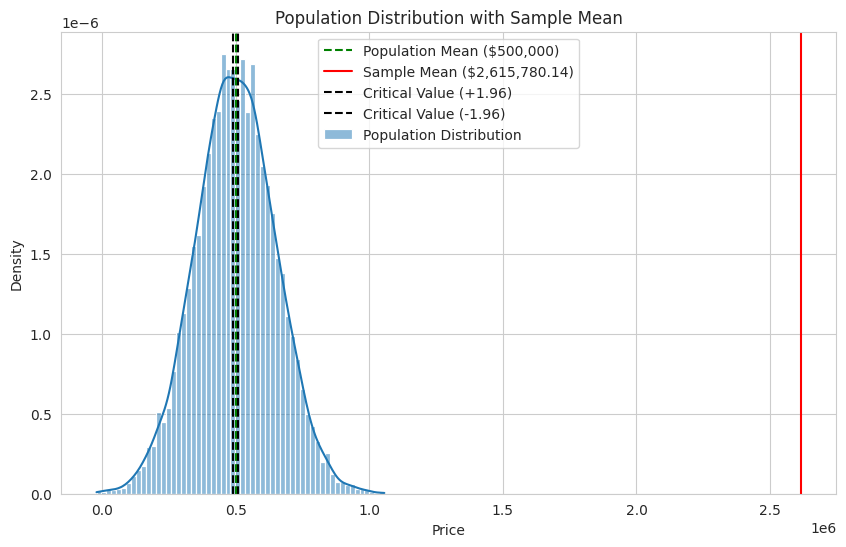

In [11]:
# Assume population_mean, population_std, and sample_mean are defined
population_dist = np.random.normal(population_mean, population_std, 10000)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(population_dist, kde=True, stat='density', label='Population Distribution')
plt.axvline(x=population_mean, color='green', linestyle='--', label='Population Mean ($500,000)')
plt.axvline(x=sample_mean, color='red', linestyle='-', label=f'Sample Mean (${sample_mean:,.2f})')

# Marking critical regions for alpha = 0.05 in a two-tailed test
plt.axvline(x=population_mean + 1.96 * population_std / np.sqrt(sample_size), color='black', linestyle='--', label='Critical Value (+1.96)')
plt.axvline(x=population_mean - 1.96 * population_std / np.sqrt(sample_size), color='black', linestyle='--', label='Critical Value (-1.96)')

plt.title('Population Distribution with Sample Mean')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

---
# Part 3: ML Algorithm & Design
We have decided to utilize the Random Forest Regressor model. This model is robust to outliers, handles both linear and non-linear relationships well, and is easy to use in terms of interpreting the results. Random Forest can also effectively handle the multiple outputs we have in our target (PRICE, PROPERTYSQFT, BEDS, BATH), making it a good fit for predicting a best housing option.

In [32]:
import folium
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
features = df_cleaned[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
target = df_cleaned[['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [15]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

We have scaled the features and split the data into training and testing sets. We'll now use these to fit our model.

In [16]:
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## predict_best_housing()
this function takes in a location and price range and looks predicts the best housing options based on features such as the beds, baths, square feet all compared to distance and price.

In [33]:
def predict_best_housing(location, price_range):
    # Filter the data based on location and price range
    filtered_data = df_cleaned[(df_cleaned['PRICE'] <= price_range[1]) &
                                 (df_cleaned['PRICE'] >= price_range[0])]
    features_filtered = filtered_data[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
    features_filtered_scaled = scaler.transform(features_filtered)
    predictions = rf_regressor.predict(features_filtered_scaled)

    # Convert predictions to DataFrame for better readability
    predictions_df = pd.DataFrame(predictions, columns=['Predicted Price', 'Predicted SqFt', 'Predicted Beds', 'Predicted Bath'])
    predictions_df['Address'] = filtered_data['FORMATTED_ADDRESS'].values
    predictions_df['Latitude'] = filtered_data['LATITUDE'].values
    predictions_df['Longitude'] = filtered_data['LONGITUDE'].values

    return predictions_df


## create_map()
In order to make this as usable as possible, we decided to create a map that is fitted to the top 5 predicted housing options with interactability that allows users to see information about each option.

In [37]:
def create_map(predicted_houses):
    # Initialize the map
    folium_map = folium.Map(location=[predicted_houses.iloc[0]['Latitude'], predicted_houses.iloc[0]['Longitude']], zoom_start=13)

    # List to store the locations for zoom adjustments
    locations = []

    # Add markers for the top 5 addresses
    for index, row in predicted_houses.head(5).iterrows():
        location = [row['Latitude'], row['Longitude']]
        locations.append(location)
        folium.Marker(
            location=location,
            popup=folium.Popup(f"Address: {row['Address']}<br>"
                               f"Predicted Price: ${row['Predicted Price']:.2f}<br>"
                               f"Predicted SqFt: {row['Predicted SqFt']:.2f} sqft<br>"
                               f"Predicted Beds: {row['Predicted Beds']:.2f}<br>"
                               f"Predicted Bath: {row['Predicted Bath']:.2f}", max_width=250),
            icon=folium.Icon(color='blue')
        ).add_to(folium_map)

    # Adjust the map to fit the markers
    folium_map.fit_bounds(locations)

    return folium_map

## Example Usage

location input -> The user's desired location

price_range_input -> (minimum, maximum)

The rest will first predict the optimal housing options and then generate an interactable map for the user to see their options.

In [46]:
location_input = 'New York'
price_range_input = (500000, 1000000)
predicted_houses = predict_best_housing(location_input, price_range_input)
house_map = create_map(predicted_houses)
house_map

## Visualizing Predictions vs. Real Values

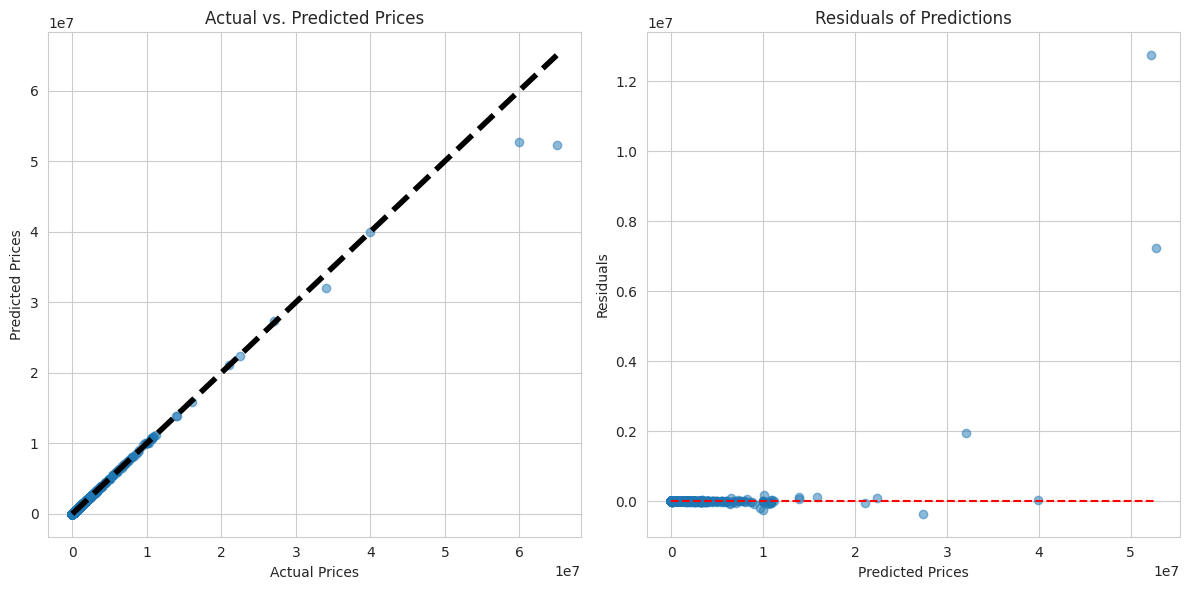

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))  # Adjust total size of the figure

# First subplot for Actual vs. Predicted values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line showing perfect predictions

# Second subplot for Residuals
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals of Predictions')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')  # Line at 0 for reference

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Error, Calculating R-Squared

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_regressor.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.564684275272144


## Interpreting & Explaining Error

An R-squared of 0.564 indicates that our model explains approximately 56.47% of the variance in the target variable, suggesting a moderate fit. This could be due to missing key predictive features, insufficient model complexity, or data quality issues. Enhancing the model by adding more relevant features, fine-tuning model parameters, or exploring more sophisticated modeling techniques might improve its predictive accuracy.

#Bibliography

Dataset - https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market